### Análise de investimento com incerteza (Simulação de Monte Carlo)

Valor futuro de um investimento:

$$
VF = VP \cdot (1 + i)^n
$$

O retorno ($i$) é incerto, mas acredita-se que estará entre $-5\%$ e $10\%$ ao ano.  
Consideremos um investimento de $10.000$.  
Quanto ele estará valendo depois de 5 anos?

In [180]:
#Parametros
VP = 10000
n = 5

In [181]:
def VF(i, VP = VP, n = n):
    return(VP * (1 + i)**n)

In [182]:
#Numero de simulacoes
NSim = 10**6

In [183]:
import numpy as np
import numpy.random as npr

npr.seed(0)
i = npr.uniform(low=-0.05, high=0.10, size = NSim)

In [184]:
#Simular NSim cenários
VF_simulados = VF(i)

In [185]:
#Valor esperado do investimento
np.mean(VF_simulados)

11519.580827121608

In [186]:
#Valor mediano do investimento
np.median(VF_simulados)

11320.773008578744

In [187]:
#Probabilidade de perder dinheiro
sum(VF_simulados < VP)/len(VF_simulados)

0.332802

In [188]:
#Var 5%
np.quantile(VF_simulados, q = 0.05)

8050.673707347896

# Avaliação de ações com base no Método de Monte Carlo

Imagine uma ação. Por simplicidade, pense que ela vale 1 real.  
Acredita-se que, ao longo do próximo ano, a ação terá rendimentos diários entre -10% e +10%.

Qual é a probabilidade de ganharmos dinheiro com essa ação?
Pare e pense antes de avançar. A ação tem a mesma chance de subir e de cair.  
Se subir, sobe até 10%. Se cair, cai até 10%.  
Qual é a probabilidade de você ganhar dinheiro com essa ação, ao final de 1 ano?

Guarde sua resposta.  
Voltaremos a ela depois.

Uma forma de abordar essa questão é simular um número muito grande de evoluções possíveis para essa ação. Vamos simular 10 mil cenários por um período de 1 ano (252 dias)

In [189]:
NSim = int(1e4)
T = 252
npr.seed(0)

Construir um cenário é construir 10 mil possíveis séries de retornos diários ao longo de 252 dias. Vamos fazer isso:

In [190]:
retornos = npr.uniform(low=-0.10, high=0.10, size = NSim * T).reshape(NSim, T)

In [191]:
retornos.shape

(10000, 252)

Com um pouco de matemática de ensino médio, você consegue ver que a cada dia, o preço da ação é multiplicado por (1 + o retorno da ação naquele dia). Assim, o preço de uma ação após $n$ dias será

$$
\prod_{i=1}^{n} (1 + r_i)
$$

Podemos calcular o preço da ação no tempo $t$ usando o método `.cumprod`, que significa "produto cumulativo":

In [192]:
preco_t = (1 + retornos).cumprod(axis = 1)

Vamos ver como a nossa ação se comporta em algumas das nossas simulações:

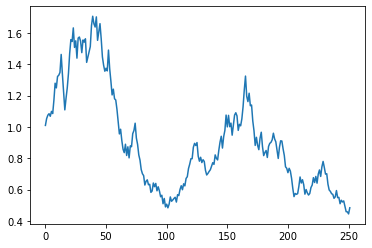

In [193]:
plt.plot(preco_t[0]);

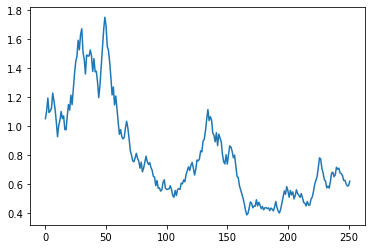

In [194]:
plt.plot(preco_t[1]);

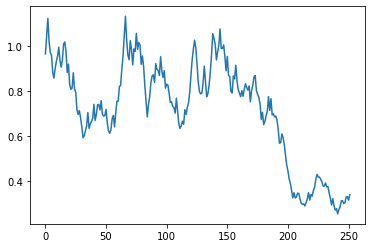

In [195]:
plt.plot(preco_t[2]);

Parece com o preço de uma ação de verdade?

![acao](http://blogs.cfainstitute.org/investor/files/2012/12/BID-stock-prices.png)

Nós estamos interessados no que acontece ao final de um ano. Vamos observar o preço final da ação em cada simulação:

In [196]:
preco_final = preco_t[:,-1]

Se você tem dúvidas de que o comando acima realmente nos dá o preço final, note que temos, de fato, 10000 preços, um para cada simulação:

In [197]:
preco_final.shape

(10000,)

Agora podemos fazer as perguntas que importam.  

Comecemos pela nossa pergunta principal:

Qual é a probabilidade de ganharmos dinheiro com essa ação?

In [198]:
sum(preco_final > 1) / len(preco_final)

0.3213

Não, não é 50%! É apenas 32%!  
Se você está surpreso, pense assim:  
Se uma ação cai 10%, você precisa de um aumento de mais do que 10% para recuperar a perda.  
Ao longo de 252 dias, você vai ter dias ruins, e recuperar esses dias ruins se torna cada vez mais difícil.  
Esse é o motivo pelo qual [Warren Buffet](https://en.wikipedia.org/wiki/Warren_Buffett) enunciou uma de suas regras mais famosas: [_Never lose money](https://www.investopedia.com/financial-edge/0210/rules-that-warren-buffett-lives-by.aspx#:~:text=Berkshire%20Hathaway%20CEO%20Warren%20Buffett%20is%20continuously%20ranked,sayings%20is%20%22Rule%20No.%201%3A%20Never%20lose%20money.)_.
Nunca perca dinheiro, porque se você perder 10%, vai precisar de um ganho maior ainda para recuperar o patrimônio perdido.  

Vamos abordar outras questões:

Qual é o preço esperado dessa ação após 1 ano?

In [199]:
preco_final.mean()

0.9931054227154898

Cerca de 1% abaixo do preço original!

Outra pergunta muito importante em análise de investimentos é esta:

Em 95% dos casos, qual é o menor valor que essa ação estará valendo após 1 ano?

Isso se chama o _valor em risco_ (_value at risk_), ou simplemente [VAR](https://en.wikipedia.org/wiki/Value_at_risk), de uma ação.

In [200]:
np.quantile(preco_final, q=0.05)

0.14405462623530843

Ou seja, em 95% dos casos a ação que compramos por 1 real estará valendo pelo menos 14 centavos ao final do ano. Muito arriscada essa ação, você não acha?  

Considerar o risco de uma ação é fundamental em qualquer gestão de portfólio. O conceito de VAR surge exatamente como resposta a um dos casos mais emblemáticos de falha na gestão de risco e de auditoria: [a falência do banco Barrings](https://en.wikipedia.org/wiki/Barings_Bank), um dos maiores bancos da Inglaterra e do mundo, que por causa de um único funcionário, acabou falindo e sendo vendido por apenas uma libra.

Você toparia comprar um dos maiores bancos do mundo por uma libra?

### Cálculo de $\pi$ pelo método de Monte Carlo

![pi](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/330px-Pi_30K.gif)

Jogamos pontos aleatoriamente no quadrado de lado $1$.

O número de pontos dentro do círculo é proporcional à área do círculo.  
O número de pontos dentro do quadrad é proporcional à área do quadrad.

A área do quadrado é 1.  
A área do círculo é $\frac{1}{4}\pi$

Assim, 

$$
\frac{N_c}{N_q} = \frac{\pi}{4}
$$

e portanto

$$
\pi = 4 \cdot \frac{N_c}{N_q}
$$

Vamos jogar pontos no quadrado:

In [201]:
Nq = 10**6
x = npr.random(Nq)
y = npr.random(Nq)

Quantos pontos cairam dentro do círculo?

In [202]:
Nc = sum(x**2 + y**2 < 1)
Nc

785532

Isso nos dá um valor de $\pi$ igual a...

In [203]:
4 * Nc / Nq

3.142128